In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

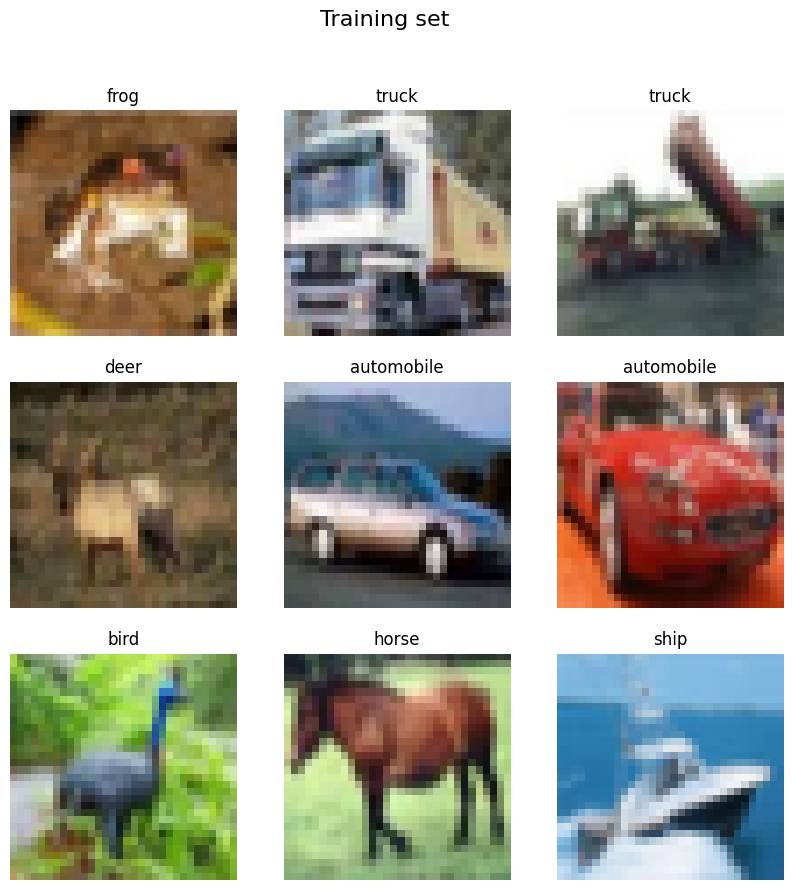

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(10, 10))
plt.suptitle('Training set', fontsize=16)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

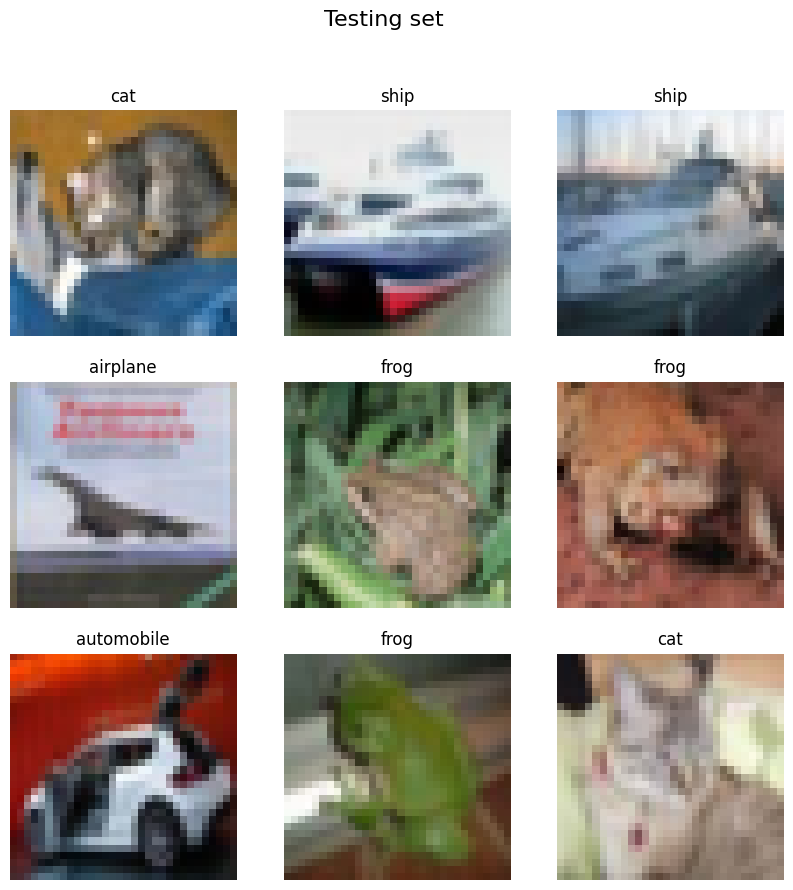

In [ ]:
plt.figure(figsize=(10, 10))
plt.suptitle('Testing set', fontsize=16)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i])
    plt.title(class_names[y_test[i][0]])
    plt.axis('off')
plt.show()

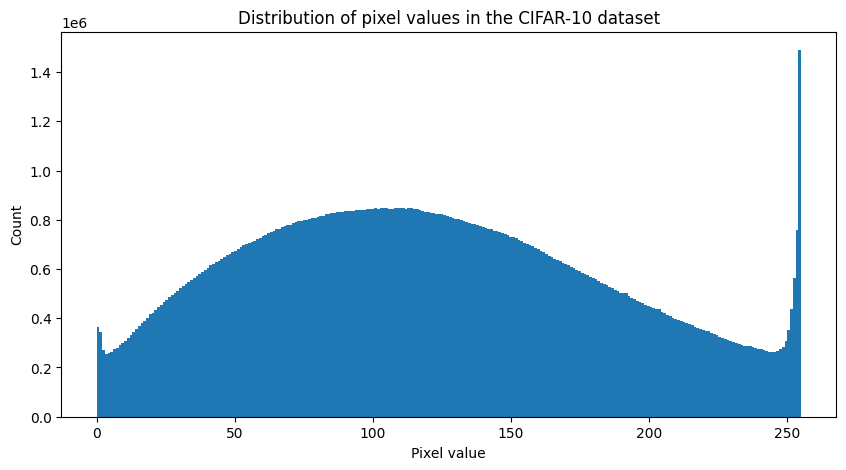

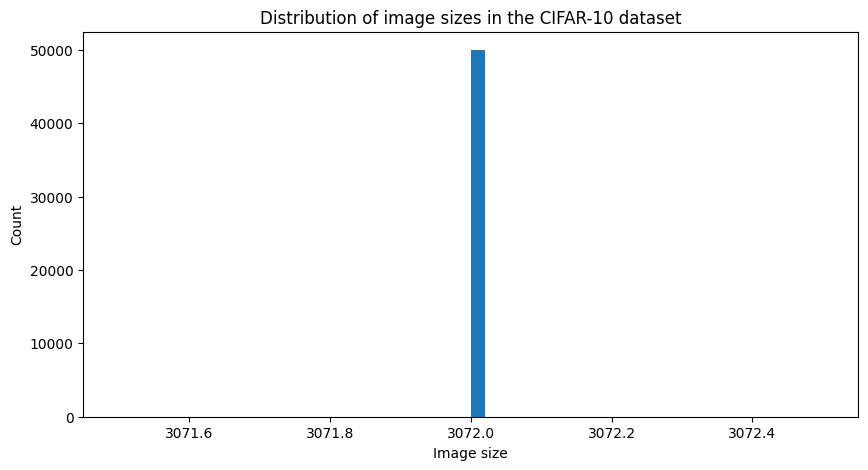

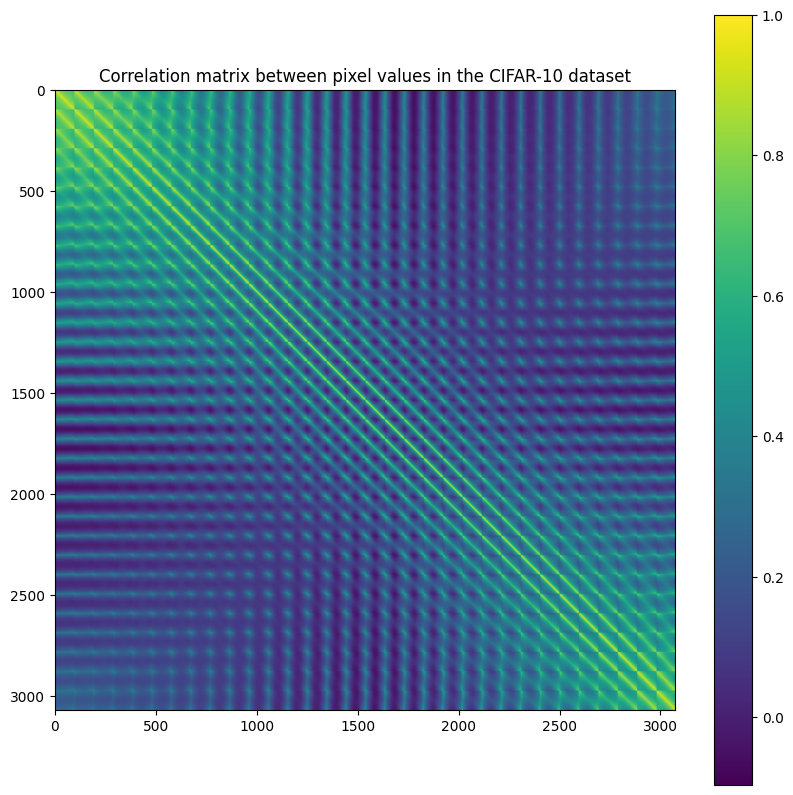

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(x_train.ravel(), bins=256)
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.title('Distribution of pixel values in the CIFAR-10 dataset')
plt.show()

sizes = [x_train[i].size for i in range(len(x_train))]
plt.figure(figsize=(10, 5))
plt.hist(sizes, bins=50)
plt.xlabel('Image size')
plt.ylabel('Count')
plt.title('Distribution of image sizes in the CIFAR-10 dataset')
plt.show()

corr = np.corrcoef(x_train.reshape(x_train.shape[0], -1).T)
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='viridis')
plt.colorbar()
plt.title('Correlation matrix between pixel values in the CIFAR-10 dataset')
plt.show()

In [ ]:
# Randomize the order of the images in the training set
train_indices = np.arange(x_train.shape[0])
np.random.shuffle(train_indices)
x_train = x_train[train_indices]
y_train = y_train[train_indices]


# Split the training set into training and validation sets
val_split = 0.1
num_val_samples = int(val_split * len(x_train))
x_val = x_train[:num_val_samples]
y_val = y_train[:num_val_samples]
x_train = x_train[num_val_samples:]
y_train = y_train[num_val_samples:]


print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_val shape:', x_val.shape)
print('y_val shape:', y_val.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (45000, 32, 32, 3)
y_train shape: (45000, 1)
x_val shape: (5000, 32, 32, 3)
y_val shape: (5000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
num_classes = 10
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

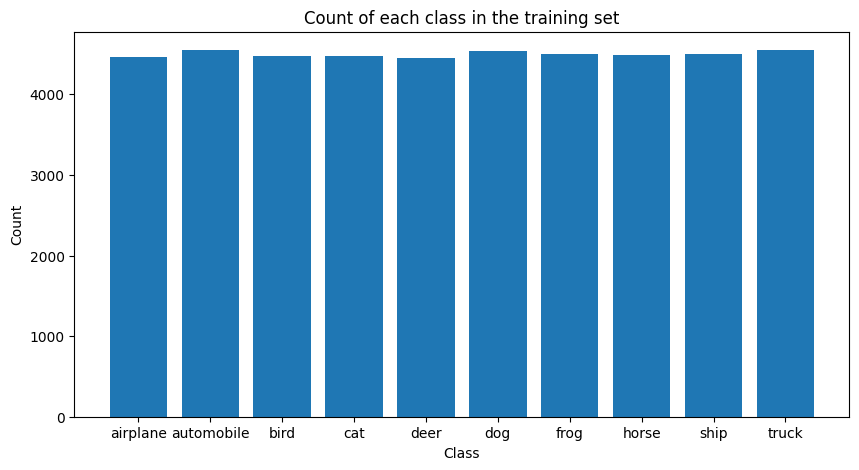

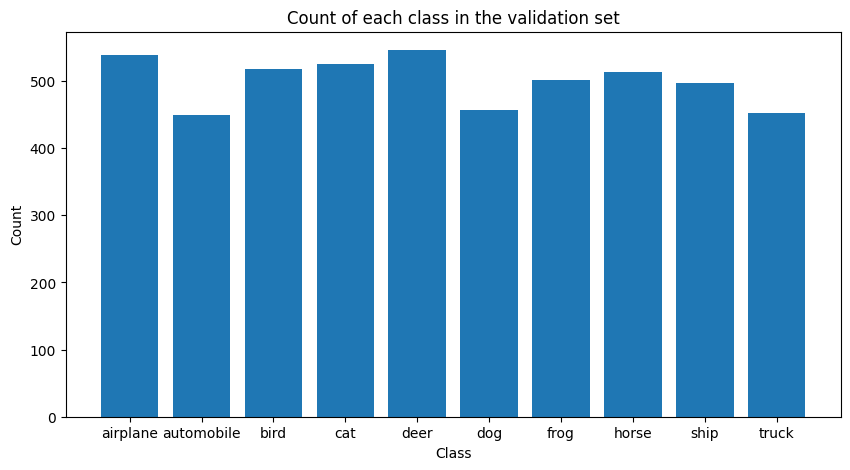

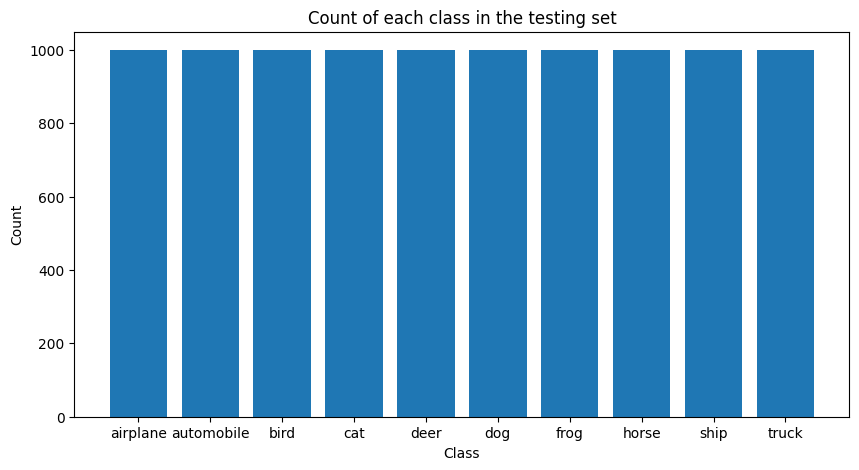

In [ ]:
train_counts = np.zeros(10)
for label in y_train:
    train_counts[np.argmax(label)] += 1

val_counts = np.zeros(10)
for label in y_val:
    val_counts[np.argmax(label)] += 1

test_counts = np.zeros(10)
for label in y_test:
    test_counts[np.argmax(label)] += 1

plt.figure(figsize=(10, 5))
plt.bar(np.arange(10), train_counts)
plt.xticks(np.arange(10), class_names)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of each class in the training set')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(np.arange(10), val_counts)
plt.xticks(np.arange(10), class_names)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of each class in the validation set')
plt.show()


plt.figure(figsize=(10, 5))
plt.bar(np.arange(10), test_counts)
plt.xticks(np.arange(10), class_names)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of each class in the testing set')
plt.show()

Building model - CNN with 4 convolutional layers

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 291s 408ms/step - accuracy: 0.3460 - loss: 1.7705 - val_accuracy: 0.5864 - val_loss: 1.1508
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 284s 404ms/step - accuracy: 0.6072 - loss: 1.1137 - val_accuracy: 0.6659 - val_loss: 0.9395
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 320s 400ms/step - accuracy: 0.6678 - loss: 0.9411 - val_accuracy: 0.7156 - val_loss: 0.8116
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 322s 400ms/step - accuracy: 0.7065 - loss: 0.8286 - val_accuracy: 0.7412 - val_loss: 0.7464
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 320s 397ms/step - accuracy: 0.7351 - loss: 0.7488 - val_accuracy: 0.7324 - val_loss: 0.7697
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 323s 399ms/step - accuracy: 0.7602 - loss: 0.6797 - val_accuracy: 0.7638 - val_loss: 0.6859
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 321s 398ms/step - accuracy: 0.7744 - loss: 0.6337 - val_accuracy: 0.7524 - val_loss: 0.7158
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 320s 395ms/step - accuracy: 0.7852 -

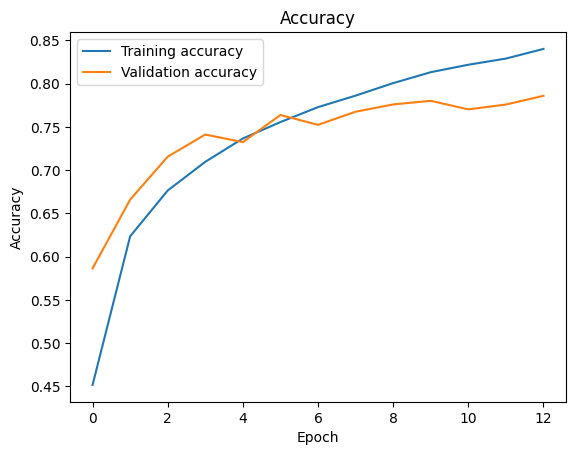

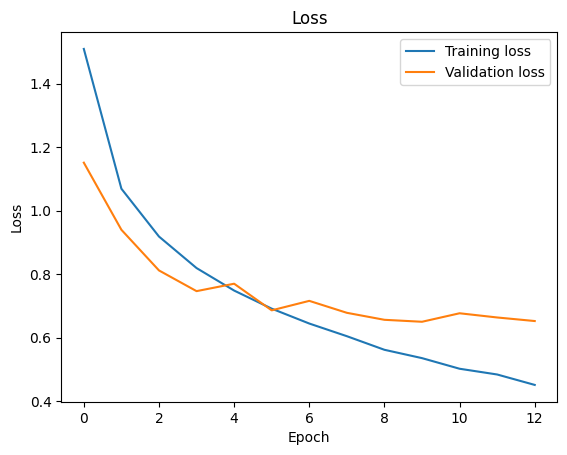

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=3)


history = model.fit(x_train, y_train, batch_size=64, epochs=50,validation_data=(x_test, y_test), callbacks=[early_stop])


test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

# Plot
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()